#Nombres

In [1]:
#Importamos las librerias Necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import plotly.graph_objects as go

In [2]:
#Leemos todos los csv
dfx = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2016_2017_49_marzo2022.xlsx') 
df1 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2017_2017_50_marzo2022.xlsx') 
df2 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2017_2018_51_marzo2022.xlsx')
df3 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2018_2018_52_marzo2022.xlsx')
df4 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2018_2019_53_marzo2022.xlsx')
df5 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2019_2019_54_marzo2022.xlsx')
df6 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2020_2019_55_marzo2022.xlsx')
df7 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2020_2020_56_marzo2022.xlsx')
df8 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2020_2021_57_marzo2022.xlsx')
df9 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2021_2021_58_marzo2022.xlsx')
df0 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2021_2022_59_marzo2022.xlsx')

In [16]:
#Concatenamos todos los archivos
df = pd.concat([dfx, df1, df2, df3, df4, df5, df6, df7, df8, df9, df0], ignore_index = True)
df.head()

,COHORTE,PERÍODO ACADÉMICO CURSA,SEDE,CAMPUS,CARRERA,ÁREA,MODALIDAD,TIPO PROYECTOEDUCATIVO,NRO ALUMNOS
0,2016 - 2017,2016 - 2017,GUAYAQUIL,CENTENARIO,COMPUTACIÓN,CIENCIA Y TECNOLOGÍA,PRESENCIAL,NUEVA O REDISEÑO,69
1,2016 - 2017,2016 - 2017,GUAYAQUIL,CENTENARIO,ELECTRICIDAD,CIENCIA Y TECNOLOGÍA,PRESENCIAL,NUEVA O REDISEÑO,50
2,2016 - 2017,2016 - 2017,MATRIZ CUENCA,EL VECINO,COMPUTACIÓN,CIENCIA Y TECNOLOGÍA,PRESENCIAL,NUEVA O REDISEÑO,124
3,2016 - 2017,2016 - 2017,MATRIZ CUENCA,EL VECINO,EDUCACIÓN BÁSICA,EDUCACION,PRESENCIAL,NUEVA O REDISEÑO,38
4,2016 - 2017,2016 - 2017,MATRIZ CUENCA,EL VECINO,EDUCACIÓN INICIAL,EDUCACION,PRESENCIAL,NUEVA O REDISEÑO,28


In [17]:
#Limpieza de datos
df.drop(df[df['PERÍODO ACADÉMICO CURSA'] == '2022 - 2022'].index, inplace = True)
len(df.index)

2947

In [18]:
cohortes = df.COHORTE.unique()
sedes = df.SEDE.unique()
campus = df.CAMPUS.unique()
carreras = df.CARRERA.unique()
areas = df.ÁREA.unique()

In [22]:
sedes

array(['GUAYAQUIL', 'MATRIZ CUENCA', 'QUITO'], dtype=object)

Practica 1

In [31]:
#A nivel de Area por cohortes
dx = df.loc[df['ÁREA'] == 'CIENCIAS ADMINISTRATIVAS Y ECONÓMICAS']
dy = dx.loc[dx['CARRERA'] == 'ADMINISTRACIÓN DE EMPRESAS']
dz = dy.loc[dy['SEDE'] == 'MATRIZ CUENCA']

cohovalues = []
for coho in cohortes:
    d = dz.loc[df['COHORTE'] == coho]
    cohovalues.append(d['NRO ALUMNOS'].astype(float))



In [38]:
cohovalues[8]

2633    64.0
2699    52.0
2765    48.0
Name: NRO ALUMNOS, dtype: float64

d:\Programas\Python\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: setting an array element with a sequence.

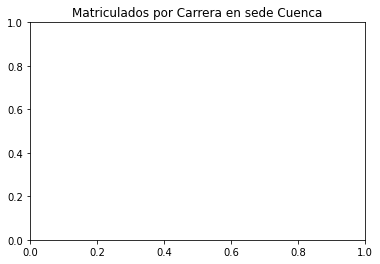

In [32]:
plt.figure()

plt.title('Matriculados por '+'Carrera'+' en sede '+'Cuenca')

plt.plot([49,50,51,52,53,54,55,56,57,58,59], cohovalues[], 'b.-')

plt.xticks(cohortes.tolist())

plt.xlabel('Anio')
plt.ylabel('Valor Dolares')
plt.legend()
plt.show()

In [ ]:
plt.figure()

plt.title('Precios del Gas')

plt.plot(dy.loc[df['COHORTE'] == '2017 - 2017'], datos.USA, 'b.-')
plt.plot(datos.Year, datos.Canada, 'r.-')
plt.plot(datos.Year, datos.Australia, 'y.-')

plt.xticks(datos.Year[::3].tolist())

plt.xlabel('Anio')
plt.ylabel('Valor Dolares')
plt.legend()
plt.show()

In [14]:
carrlabels

array(['ADMINISTRACIÓN DE EMPRESAS', 'CONTABILIDAD Y AUDITORÍA',
       'GERENCIA Y LIDERAZGO', 'ECONOMÍA', 'DESARROLLO LOCAL',
       'CONTABILIDAD Y AUDITORIA [EN LINEA]'], dtype=object)

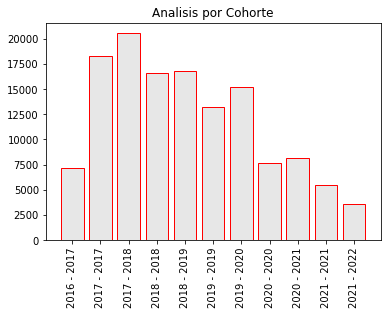

In [8]:
#A nivel de Area
carrvalues = []
for carrera in carreras:
    dx = df.loc[df['CARRERA'] == carrera]
    carrvalues.append(dx['NRO ALUMNOS'].sum())

plt.figure()
plt.xticks(rotation = 90)
plt.title("Analisis por Cohorte")
barras = plt.bar(cohortes, cohovalues, color=(0.1, 0.1, 0.1, 0.1),edgecolor='red')